## Ноутбук содержит репрезентативные примеры работы алгоритма с оценками качества его работы и их визуализацией.

#### Фотографии, на которых будет проверяться работа алгоритма, находятся в директории:

https://github.com/bolshakova-anna/Intelligent_Placer/tree/main/data


#### Разметка ожидаемых результатов приведена ниже:


In [1]:
import pandas as pd
from IPython.display import display

url ='https://raw.githubusercontent.com/bolshakova-anna/Intelligent_Placer/main/data/label.csv'
df = pd.read_csv(url, index_col=0)
display(df)

,label
input path,
github.com/bolshakova-anna/Intelligent_Placer/tree/develop/data/examples/1/in.jpeg,true
github.com/bolshakova-anna/Intelligent_Placer/tree/develop/data/examples/2/in.jpeg,false
github.com/bolshakova-anna/Intelligent_Placer/tree/develop/data/examples/3/in.jpeg,true
github.com/bolshakova-anna/Intelligent_Placer/tree/develop/data/examples/4/in.jpeg,false
github.com/bolshakova-anna/Intelligent_Placer/tree/develop/data/examples/5/in.jpeg,false
github.com/bolshakova-anna/Intelligent_Placer/tree/develop/data/examples/6/in.jpeg,true
github.com/bolshakova-anna/Intelligent_Placer/tree/develop/data/examples/7/in.jpeg,true
github.com/bolshakova-anna/Intelligent_Placer/tree/develop/data/examples/8/in.jpeg,false
github.com/bolshakova-anna/Intelligent_Placer/tree/develop/data/examples/9/in.jpeg,false


Для последующего анализа работы алгоритма определим вспомогательную функцию:

In [1]:
import os
import time
from intelligent_placer_lib import check_image
from matplotlib import pyplot as plt

def sample_inf(n:int):
    image_file = os.path.join("data", "examples", f'{n}', 'in.jpg')
    start_time = time.time()
    res, img = check_image(image_file)
    print(f"Результат:{res}")
    print(f"Время выполнения: {time.time() - start_time} сек.")
    



### Пример 1

Ожидаемый результат : True

Полученный результат: True

пояснение к результату: При каждом успешном размещении выводится график вида: **|объект|незанятое пространство|размещение|** для иллюстрации работы алгоритма.


<Figure size 432x288 with 0 Axes>

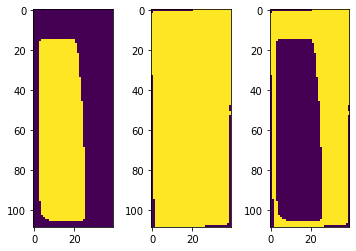

Результат:True
Время выполнения: 4.254831552505493 сек.


In [2]:
sample_inf(1)

### Пример 2

Ожидаемый результат : False

Полученный результат: False

пояснение к результату: площадь найденных объектов больше площадь многоугольника. Размещение заведомо невозможно.


In [3]:
sample_inf(2)

Результат:False
Время выполнения: 3.763148546218872 сек.


### Пример 3

Ожидаемый результат : True

Полученный результат: False

пояснение к результату: не получилось расположить предметы, которые в теории можно положить (см. out.jpg в соотв. директории)


In [7]:
sample_inf(3)

Результат:False
Время выполнения: 441.70549964904785 сек.


### Пример 4

Ожидаемый результат : False

Полученный результат: False




In [6]:
sample_inf(4)

Результат:False
Время выполнения: 517.8460960388184 сек.


### Пример 5

Ожидаемый результат : False

Полученный результат: False

пояснение к результату: сработало ограничение по площади



In [9]:
sample_inf(5)

Результат:False
Время выполнения: 4.715327262878418 сек.


### Пример 6

Ожидаемый результат : True

Полученный результат: True


In [ ]:
sample_inf(6)

### Пример 7

Ожидаемый результат : True

Полученный результат: True




<Figure size 432x288 with 0 Axes>

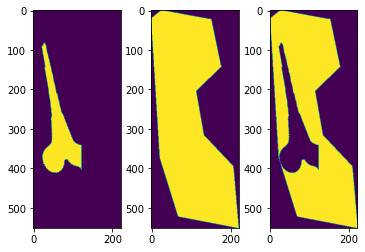

<Figure size 432x288 with 0 Axes>

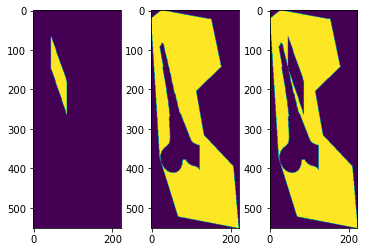

Результат:True
Время выполнения: 15.597378969192505 сек.


In [14]:
sample_inf(7)

### Пример 8

Ожидаемый результат : False

Полученный результат: False



In [2]:
sample_inf(8)

Результат:False
Время выполнения: 4.5840232372283936 сек.


### Пример 9
Ожидаемый результат : False

Полученный результат: False

пояснение: нет многоугольника

In [8]:
sample_inf(9)

Результат:False
Время выполнения: 5.265567302703857 сек.


### Пример 10
Ожидаемый результат : True

Полученный результат: False

пояснение: тут все плохо - какой то мусор отпределился как предмет , два близкий предмета - как один:(

<Figure size 432x288 with 0 Axes>

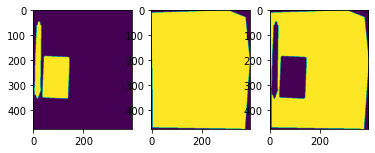

<Figure size 432x288 with 0 Axes>

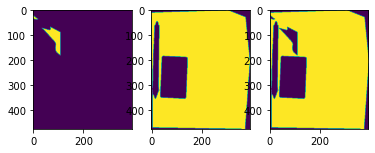

Результат:False
Время выполнения: 61.33603072166443 сек.


In [15]:
sample_inf(10)

### Вывод:

##### Проведено испытаний: 10 
- Успешных срабатываний: 7
- Неуспешный срабатываний: 3 

Замечания по проделанной работе:
- Что плохо:
    - Данная реализация плейсера сильно зависит от числа изображений и удачном их изначальном повороте. 
    - В худшем случае, из-за полного перебора, даже с учетом предпроверок для избежания рассматривания заведомо неверных конфигураций размещения, и с учетом того, что были использованы (где возможно) внутренние операции по работе с массивами из пакета numpy, алгоритм долго работает.
- Что хорошо:
    - Работа с бинарными масками позволяет учитывать форму предмета и области настолько корректно, насколько корректно была найдена эта маска. В случае, если маска предмет имеет полости, в которые можно попробовать расположить другой предмет - этот случай будет рассмотрен.
    - Таким образом, если размещение было найдено - оно точно возможно.